# Gradient Boosting 예측 모형

In [2]:
#%matplotlib inline
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

#파일 저장
import os
font_name = mpl.font_manager.FontProperties(fname='C:/Windows/Fonts/malgunsl.ttf').get_name()
mpl.rc('font', family=font_name)

df = pd.read_csv('merged_data/result_total.csv',  header=1, encoding='euc-kr' )
df

,년도,자치구,사람 수,남자수,여자수,유기견수,복귀,입양분양,폐사안락사,계류기증,...,비거주용 건물내 주택_여,주택이외의 거처_남,주택이외의 거처_여,20세미만,20대,30대,40대,50대,60대,70대이상
0,2005,합계,10167344,5062492,5104852,14679,601,525,7736,5817,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2005,종로구,169315,84981,84334,258,12,3,89,154,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2005,중구,130027,64995,65032,264,0,9,102,153,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2005,용산구,230260,113158,117102,383,12,12,170,189,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2005,성동구,337744,169346,168398,431,19,7,96,309,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359,2018,관악구,501957,252160,249797,493,207,275,11,-,...,3988.0,10141.0,9072.0,1048.0,44034.0,29453.0,12561.0,9599.0,7968.0,8070.0
360,2018,서초구,433951,207868,226083,124,42,15,64,3,...,703.0,3164.0,2883.0,504.0,8625.0,11800.0,7192.0,4776.0,4137.0,4103.0
361,2018,강남구,542364,259611,282753,158,58,41,57,2,...,1165.0,4985.0,4935.0,421.0,13164.0,20173.0,10591.0,6413.0,5760.0,6205.0
362,2018,송파구,666635,323526,343109,211,57,62,90,2,...,844.0,5549.0,5669.0,286.0,12058.0,18041.0,10580.0,8130.0,7496.0,6860.0


In [3]:
x_train = df.iloc[:,[0,1,2,3,4,6,7,8,9]].replace('-',0)
x_train

,년도,자치구,사람 수,남자수,여자수,복귀,입양분양,폐사안락사,계류기증
0,2005,합계,10167344,5062492,5104852,601,525,7736,5817
1,2005,종로구,169315,84981,84334,12,3,89,154
2,2005,중구,130027,64995,65032,0,9,102,153
3,2005,용산구,230260,113158,117102,12,12,170,189
4,2005,성동구,337744,169346,168398,19,7,96,309
...,...,...,...,...,...,...,...,...,...
359,2018,관악구,501957,252160,249797,207,275,11,0
360,2018,서초구,433951,207868,226083,42,15,64,3
361,2018,강남구,542364,259611,282753,58,41,57,2
362,2018,송파구,666635,323526,343109,57,62,90,2


In [4]:
x_train = x_train[x_train['자치구'] != '합계']
x_train = x_train.set_index('년도').reset_index()
x_train

,년도,자치구,사람 수,남자수,여자수,복귀,입양분양,폐사안락사,계류기증
0,2005,종로구,169315,84981,84334,12,3,89,154
1,2005,중구,130027,64995,65032,0,9,102,153
2,2005,용산구,230260,113158,117102,12,12,170,189
3,2005,성동구,337744,169346,168398,19,7,96,309
4,2005,광진구,375613,187320,188293,47,16,290,435
...,...,...,...,...,...,...,...,...,...
345,2018,관악구,501957,252160,249797,207,275,11,0
346,2018,서초구,433951,207868,226083,42,15,64,3
347,2018,강남구,542364,259611,282753,58,41,57,2
348,2018,송파구,666635,323526,343109,57,62,90,2


In [5]:
len(x_train.columns)

9

In [6]:
train_x=x_train.iloc[:,2 : len(x_train.columns)]
train_x

,사람 수,남자수,여자수,복귀,입양분양,폐사안락사,계류기증
0,169315,84981,84334,12,3,89,154
1,130027,64995,65032,0,9,102,153
2,230260,113158,117102,12,12,170,189
3,337744,169346,168398,19,7,96,309
4,375613,187320,188293,47,16,290,435
...,...,...,...,...,...,...,...
345,501957,252160,249797,207,275,11,0
346,433951,207868,226083,42,15,64,3
347,542364,259611,282753,58,41,57,2
348,666635,323526,343109,57,62,90,2


In [7]:
y_train = df.iloc[:,[1,5]]
y_train = y_train[y_train['자치구'] != '합계'].set_index('자치구').reset_index()
train_y = y_train.iloc[:,[1]]
train_y

,유기견수
0,258
1,264
2,383
3,431
4,788
...,...
345,493
346,124
347,158
348,211


In [8]:
from pyecharts import Bar3D

ERROR:lml.utils:failed to import pyecharts_snapshot
Traceback (most recent call last):
  File "C:\ai\python\anaconda3\lib\site-packages\lml\utils.py", line 43, in do_import
    plugin_module = __import__(plugin_module_name)
ModuleNotFoundError: No module named 'pyecharts_snapshot'


In [9]:
# 2013년 이후 유기견 수가 400 마리를 유지하는 지역은 관악구뿐이다. 
#그 전년도인 용산구, 은평구, 양천구, 강동구도 400마리 이상 지역에 포함되었다.
#그럼 그 5개 지역의 데이터를 비교해보자.
#지역 관악구, 용산구, 은평구, 양천구, 강동구
#12년도에 비교할 수 있는 데이터는 인구수와 공원율 뿐이다.
#그럼 우선 구별, 년도별 인구수 비교해보자.

In [10]:
#예측모형 사용
#x_train, y_train 만들기
#y_tain은 예측할 값 : 유기견 수
#x_train은 요소들 : 사람수, 남자수, 여자수, , 공원율 등등, 빈값이 있으면 안됨

In [11]:
from sklearn.ensemble import GradientBoostingRegressor

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
X_train, X_test, y_train, y_test = train_test_split(train_x, train_y, test_size=0.3, random_state=42)

In [13]:
#X_train, X_test, y_train, y_test = train_test_split(train_x, train_y, test_size=0.3, random_state=42)
gbrt = GradientBoostingRegressor(max_depth=3, warm_start=True, random_state=42)

min_val_error = float("inf")
error_going_up = 0
for n_estimators in range(1, 9999):
    gbrt.n_estimators = n_estimators
    gbrt.fit(X_train, y_train)
    y_pred = gbrt.predict(X_test)
    val_error = mean_squared_error(y_test, y_pred)
    print((val_error)**0.5)
    if val_error < min_val_error:
        min_val_error = val_error
        error_going_up = 0
    else:
        error_going_up += 1
        if error_going_up == 5:
            break  # 조기 종료

C:\ai\python\anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ai\python\anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ai\python\anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ai\python\anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please chan

136.3833915483287
125.86317645631446
117.15656217417494
109.44712819971204
102.54712260529595
96.76907566884357
91.97853085856963
86.28012812036678
82.3459393948343
77.63726722880793
73.76853604808723
70.84849939337546
68.7902586647888
66.17992976119876
64.4332399760814
62.8303212306383
60.66117294999782
59.36835274275203
58.958601396972874
57.15060943015234
56.31179897767214
54.98793672865012
53.94436212988357
53.310772645768935
52.72071286936248
51.95091311935292
51.19569057257799
50.44914650061554
49.98205740904509
49.46312434417374
49.14160247830577
48.70082230561956
48.50614985943645
48.16588057901657
47.73469958243758
47.40784515140453
46.96869248386995
46.61572217547266
46.32755741578965
46.30842435455455
46.05505210938217
45.976563950912364
45.82745056170755
45.66364429620994
45.45673391785334


C:\ai\python\anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ai\python\anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ai\python\anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ai\python\anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please chan

45.257998598247944
45.123104398326575
45.02760975095686
44.95442035236187
44.70896430838738
44.62726206224923
44.443817333720766
44.30883506357944
44.26183313851698
44.17713332898228
44.125894792796004
44.088431366231724
44.10186453125658
43.98278437235904
43.88801249184073
43.94700733659696
43.892881188547335
43.84428211303853
43.86114785723475
43.81144827820839

C:\ai\python\anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ai\python\anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ai\python\anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ai\python\anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please chan


43.68850613278131
43.63770475874122
43.587097032104715
43.5350142490837
43.41817587520544
43.4205090603766
43.35649726213748
43.280555195601906
43.26585624667284
43.21575899207507
43.12415324913353
43.07451524048033
43.045357576376915
42.961116347208794
42.94631058700124
42.87962572530284
42.863600883197854


C:\ai\python\anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ai\python\anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ai\python\anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ai\python\anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please chan

42.80089915474425
42.745872974771885
42.74359165749465
42.70306297785343
42.63698123501684
42.614768868505486
42.53484837189207
42.50122003620872
42.458690170908405
42.42033360158496
42.385364700267786
42.350442789007566
42.28580198356859
42.242579644194294
42.16109987036046
42.17453141468447
42.12297456831187
42.13712885982269
42.12119413632721


C:\ai\python\anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ai\python\anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ai\python\anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ai\python\anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please chan

42.14011321584957
42.10684344869464
42.00877308861582
41.99042878547072
41.983361173543834
41.964254373908986
41.946228974359435
41.948514358310646
41.85348669443686
41.8193497770713
41.801835983358714
41.76411094622768
41.79684938349539
41.79652763951074
41.719132505023886
41.79166386228725
41.787037718383836


C:\ai\python\anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ai\python\anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ai\python\anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ai\python\anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please chan

41.68128007066341
41.67051517085521
41.68182141487679
41.668903778881
41.672474990575395
41.64641601225847
41.68365430557208
41.64131808744714
41.62934741816011
41.61708702016974
41.641841329531275
41.591546599587836
41.58977441543432
41.58396731699265
41.52844136755146


C:\ai\python\anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ai\python\anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ai\python\anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ai\python\anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please chan

41.50646872396485
41.5063170041423
41.499519112413665
41.490585319216784
41.486884846444944
41.51120384665479
41.569482002296134
41.56253689445964
41.52528648136665
41.54410179449967


C:\ai\python\anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ai\python\anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ai\python\anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ai\python\anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please chan

In [14]:
import numpy as np

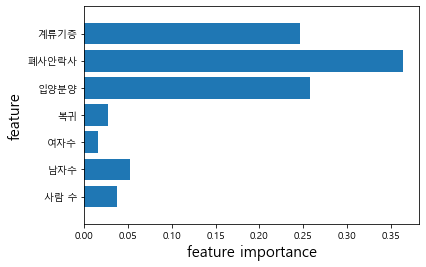

In [15]:
n_feature = train_x.shape[1] #주어진 변수들의 갯수를 구함
index = np.arange(n_feature)

input_var= list( train_x.columns[:] )
plt.barh(index, gbrt.feature_importances_, align='center') 
plt.yticks(index, input_var)
plt.ylim(-1, n_feature)
plt.xlabel('feature importance', size=15)
plt.ylabel('feature', size=15)
plt.show()

In [16]:
df

,년도,자치구,사람 수,남자수,여자수,유기견수,복귀,입양분양,폐사안락사,계류기증,...,비거주용 건물내 주택_여,주택이외의 거처_남,주택이외의 거처_여,20세미만,20대,30대,40대,50대,60대,70대이상
0,2005,합계,10167344,5062492,5104852,14679,601,525,7736,5817,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2005,종로구,169315,84981,84334,258,12,3,89,154,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2005,중구,130027,64995,65032,264,0,9,102,153,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2005,용산구,230260,113158,117102,383,12,12,170,189,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2005,성동구,337744,169346,168398,431,19,7,96,309,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359,2018,관악구,501957,252160,249797,493,207,275,11,-,...,3988.0,10141.0,9072.0,1048.0,44034.0,29453.0,12561.0,9599.0,7968.0,8070.0
360,2018,서초구,433951,207868,226083,124,42,15,64,3,...,703.0,3164.0,2883.0,504.0,8625.0,11800.0,7192.0,4776.0,4137.0,4103.0
361,2018,강남구,542364,259611,282753,158,58,41,57,2,...,1165.0,4985.0,4935.0,421.0,13164.0,20173.0,10591.0,6413.0,5760.0,6205.0
362,2018,송파구,666635,323526,343109,211,57,62,90,2,...,844.0,5549.0,5669.0,286.0,12058.0,18041.0,10580.0,8130.0,7496.0,6860.0


In [63]:
df_1= df.iloc[:,0:4].replace('-',0)
#print(df_1)
df_2 = df.iloc[:,20:len(df.columns)].replace('-',0)
#print(df_2)
df_2

,1인가구,2인가구,3인가구,4인가구,5인 가구,6인가구,7인이상 가구,평균가구원수,전체세대,1인세대,...,비거주용 건물내 주택_여,주택이외의 거처_남,주택이외의 거처_여,20세미만,20대,30대,40대,50대,60대,70대이상
0,675739.0,670455.0,732043.0,917243.0,248450.0,49781.0,16179.0,2.9,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,14592.0,11641.0,10624.0,12373.0,4087.0,905.0,312.0,2.7,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,13128.0,9833.0,9270.0,9961.0,3538.0,627.0,268.0,2.7,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,18218.0,18032.0,16187.0,17302.0,4902.0,1088.0,396.0,2.7,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,23161.0,24104.0,24784.0,28823.0,8263.0,1756.0,594.0,2.8,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359,112733.0,54106.0,35925.0,25997.0,6172.0,1451.0,377.0,2.0,262222.0,142742.0,...,3988.0,10141.0,9072.0,1048.0,44034.0,29453.0,12561.0,9599.0,7968.0,8070.0
360,41137.0,38475.0,35620.0,31029.0,7112.0,1598.0,447.0,2.6,172918.0,57213.0,...,703.0,3164.0,2883.0,504.0,8625.0,11800.0,7192.0,4776.0,4137.0,4103.0
361,62727.0,50076.0,43542.0,36572.0,8063.0,1664.0,439.0,2.4,228775.0,88584.0,...,1165.0,4985.0,4935.0,421.0,13164.0,20173.0,10591.0,6413.0,5760.0,6205.0
362,63451.0,61970.0,56824.0,48156.0,10366.0,2235.0,545.0,2.5,270866.0,90734.0,...,844.0,5549.0,5669.0,286.0,12058.0,18041.0,10580.0,8130.0,7496.0,6860.0


In [64]:
#df1과 df2를 합치기(concat)위해 위해 index를 동일하게 초기화 한다.
df_1.reset_index(drop=True , inplace=True)
df_2.reset_index(drop=True , inplace=True)

# df1 과  df2 를 컬럼으로 합치기
df_re = pd.concat([df_1, df_2], axis=1)
df_re.head(10)

,년도,자치구,사람 수,남자수,1인가구,2인가구,3인가구,4인가구,5인 가구,6인가구,...,비거주용 건물내 주택_여,주택이외의 거처_남,주택이외의 거처_여,20세미만,20대,30대,40대,50대,60대,70대이상
0,2005,합계,10167344,5062492,675739.0,670455.0,732043.0,917243.0,248450.0,49781.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2005,종로구,169315,84981,14592.0,11641.0,10624.0,12373.0,4087.0,905.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2005,중구,130027,64995,13128.0,9833.0,9270.0,9961.0,3538.0,627.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2005,용산구,230260,113158,18218.0,18032.0,16187.0,17302.0,4902.0,1088.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2005,성동구,337744,169346,23161.0,24104.0,24784.0,28823.0,8263.0,1756.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2005,광진구,375613,187320,27975.0,26349.0,26617.0,33676.0,8877.0,1772.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2005,동대문구,381110,192317,32710.0,27114.0,26816.0,31631.0,10078.0,2140.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2005,중랑구,427373,213775,25622.0,27876.0,31417.0,39299.0,10646.0,2344.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2005,성북구,462879,230451,28278.0,30470.0,33140.0,39923.0,11541.0,2683.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2005,강북구,353260,175723,19661.0,23947.0,26804.0,30732.0,8733.0,2073.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [65]:
df_re= df_re.iloc[286:338,]
df_re

,년도,자치구,사람 수,남자수,1인가구,2인가구,3인가구,4인가구,5인 가구,6인가구,...,비거주용 건물내 주택_여,주택이외의 거처_남,주택이외의 거처_여,20세미만,20대,30대,40대,50대,60대,70대이상
286,2016,합계,9930616,4876789,1138860.0,931262.0,816946.0,686469.0,163555.0,37153.0,...,18919.0,80336.0,69064.0,14937.0,270603.0,259479.0,172739.0,154561.0,128533.0,138008.0
287,2016,종로구,152737,75201,22835.0,14974.0,11060.0,8712.0,2397.0,618.0,...,400.0,2309.0,1556.0,526.0,6520.0,4209.0,3130.0,3081.0,2451.0,2918.0
288,2016,중구,125249,62204,19671.0,13086.0,9453.0,6844.0,1836.0,480.0,...,339.0,2109.0,1529.0,567.0,4582.0,3735.0,3036.0,2873.0,2348.0,2530.0
289,2016,용산구,230241,111601,31641.0,23505.0,17580.0,13121.0,3327.0,780.0,...,300.0,2057.0,1400.0,250.0,6699.0,7507.0,5375.0,4192.0,3422.0,4196.0
290,2016,성동구,299259,148326,37074.0,28668.0,24655.0,19874.0,4636.0,1164.0,...,678.0,2299.0,1698.0,878.0,9982.0,7625.0,5657.0,5109.0,3697.0,4126.0
291,2016,광진구,357215,174797,53169.0,33221.0,28757.0,24040.0,5430.0,1202.0,...,1068.0,2508.0,2292.0,805.0,16065.0,13225.0,7583.0,6570.0,4529.0,4392.0
292,2016,동대문구,355069,177640,52650.0,34094.0,27768.0,22627.0,6011.0,1584.0,...,1101.0,3986.0,3067.0,1779.0,17169.0,9031.0,6302.0,6445.0,5631.0,6293.0
293,2016,중랑구,411005,204900,45717.0,40865.0,34515.0,27503.0,6971.0,1569.0,...,596.0,1676.0,1206.0,232.0,5880.0,8705.0,8127.0,9414.0,6900.0,6459.0
294,2016,성북구,450355,219951,54117.0,41498.0,36906.0,31578.0,7791.0,1915.0,...,1366.0,2193.0,2232.0,1680.0,18264.0,8673.0,6686.0,6269.0,5597.0,6948.0
295,2016,강북구,327195,160861,36668.0,33636.0,27243.0,20969.0,5386.0,1294.0,...,377.0,1375.0,1037.0,199.0,4933.0,6150.0,5893.0,6759.0,6119.0,6615.0


In [66]:
df_test=df_re[df_re['자치구']!='합계'].set_index('년도').reset_index()
df_test

,년도,자치구,사람 수,남자수,1인가구,2인가구,3인가구,4인가구,5인 가구,6인가구,...,비거주용 건물내 주택_여,주택이외의 거처_남,주택이외의 거처_여,20세미만,20대,30대,40대,50대,60대,70대이상
0,2016,종로구,152737,75201,22835.0,14974.0,11060.0,8712.0,2397.0,618.0,...,400.0,2309.0,1556.0,526.0,6520.0,4209.0,3130.0,3081.0,2451.0,2918.0
1,2016,중구,125249,62204,19671.0,13086.0,9453.0,6844.0,1836.0,480.0,...,339.0,2109.0,1529.0,567.0,4582.0,3735.0,3036.0,2873.0,2348.0,2530.0
2,2016,용산구,230241,111601,31641.0,23505.0,17580.0,13121.0,3327.0,780.0,...,300.0,2057.0,1400.0,250.0,6699.0,7507.0,5375.0,4192.0,3422.0,4196.0
3,2016,성동구,299259,148326,37074.0,28668.0,24655.0,19874.0,4636.0,1164.0,...,678.0,2299.0,1698.0,878.0,9982.0,7625.0,5657.0,5109.0,3697.0,4126.0
4,2016,광진구,357215,174797,53169.0,33221.0,28757.0,24040.0,5430.0,1202.0,...,1068.0,2508.0,2292.0,805.0,16065.0,13225.0,7583.0,6570.0,4529.0,4392.0
5,2016,동대문구,355069,177640,52650.0,34094.0,27768.0,22627.0,6011.0,1584.0,...,1101.0,3986.0,3067.0,1779.0,17169.0,9031.0,6302.0,6445.0,5631.0,6293.0
6,2016,중랑구,411005,204900,45717.0,40865.0,34515.0,27503.0,6971.0,1569.0,...,596.0,1676.0,1206.0,232.0,5880.0,8705.0,8127.0,9414.0,6900.0,6459.0
7,2016,성북구,450355,219951,54117.0,41498.0,36906.0,31578.0,7791.0,1915.0,...,1366.0,2193.0,2232.0,1680.0,18264.0,8673.0,6686.0,6269.0,5597.0,6948.0
8,2016,강북구,327195,160861,36668.0,33636.0,27243.0,20969.0,5386.0,1294.0,...,377.0,1375.0,1037.0,199.0,4933.0,6150.0,5893.0,6759.0,6119.0,6615.0
9,2016,도봉구,348220,171238,28296.0,33279.0,30449.0,25702.0,5900.0,1375.0,...,234.0,1064.0,809.0,245.0,3129.0,4259.0,4774.0,5334.0,4715.0,5840.0


In [67]:
train_x = df_test.iloc[:,2:len(df_test.columns)]
for i in range(len(train_x)):
    train_x['합계'].loc[i] = train_x['합계'].loc[i].replace(',','')
print(train_x['합계'])


0      43554
1      38311
2      70868
3      80977
4      82691
5      96464
6     102387
7     128502
8      93623
9     104170
10    189013
11    142135
12     92788
13    118456
14    137651
15    184422
16    120431
17     58938
18     97089
19    111438
20    123911
21    129491
22    176135
23    191349
24    116063
25     45787
26     39512
27     71356
28     86650
29     84316
30     97891
31    103740
32    130766
33     94526
34    104752
35    187025
36    143727
37     94398
38    118355
39    137056
40    188176
41    121684
42     62314
43     99225
44    111548
45    124170
46    128977
47    173282
48    196672
49    120940
Name: 합계, dtype: object


C:\ai\python\anaconda3\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [68]:
train_x

,사람 수,남자수,1인가구,2인가구,3인가구,4인가구,5인 가구,6인가구,7인이상 가구,평균가구원수,...,비거주용 건물내 주택_여,주택이외의 거처_남,주택이외의 거처_여,20세미만,20대,30대,40대,50대,60대,70대이상
0,152737,75201,22835.0,14974.0,11060.0,8712.0,2397.0,618.0,190.0,2.3,...,400.0,2309.0,1556.0,526.0,6520.0,4209.0,3130.0,3081.0,2451.0,2918.0
1,125249,62204,19671.0,13086.0,9453.0,6844.0,1836.0,480.0,133.0,2.2,...,339.0,2109.0,1529.0,567.0,4582.0,3735.0,3036.0,2873.0,2348.0,2530.0
2,230241,111601,31641.0,23505.0,17580.0,13121.0,3327.0,780.0,210.0,2.3,...,300.0,2057.0,1400.0,250.0,6699.0,7507.0,5375.0,4192.0,3422.0,4196.0
3,299259,148326,37074.0,28668.0,24655.0,19874.0,4636.0,1164.0,330.0,2.4,...,678.0,2299.0,1698.0,878.0,9982.0,7625.0,5657.0,5109.0,3697.0,4126.0
4,357215,174797,53169.0,33221.0,28757.0,24040.0,5430.0,1202.0,377.0,2.3,...,1068.0,2508.0,2292.0,805.0,16065.0,13225.0,7583.0,6570.0,4529.0,4392.0
5,355069,177640,52650.0,34094.0,27768.0,22627.0,6011.0,1584.0,445.0,2.3,...,1101.0,3986.0,3067.0,1779.0,17169.0,9031.0,6302.0,6445.0,5631.0,6293.0
6,411005,204900,45717.0,40865.0,34515.0,27503.0,6971.0,1569.0,431.0,2.5,...,596.0,1676.0,1206.0,232.0,5880.0,8705.0,8127.0,9414.0,6900.0,6459.0
7,450355,219951,54117.0,41498.0,36906.0,31578.0,7791.0,1915.0,565.0,2.5,...,1366.0,2193.0,2232.0,1680.0,18264.0,8673.0,6686.0,6269.0,5597.0,6948.0
8,327195,160861,36668.0,33636.0,27243.0,20969.0,5386.0,1294.0,384.0,2.4,...,377.0,1375.0,1037.0,199.0,4933.0,6150.0,5893.0,6759.0,6119.0,6615.0
9,348220,171238,28296.0,33279.0,30449.0,25702.0,5900.0,1375.0,383.0,2.6,...,234.0,1064.0,809.0,245.0,3129.0,4259.0,4774.0,5334.0,4715.0,5840.0


In [69]:
train_x.drop(['70대이상'], axis=1, inplace=True)
train_x

,사람 수,남자수,1인가구,2인가구,3인가구,4인가구,5인 가구,6인가구,7인이상 가구,평균가구원수,...,비거주용 건물내 주택_남,비거주용 건물내 주택_여,주택이외의 거처_남,주택이외의 거처_여,20세미만,20대,30대,40대,50대,60대
0,152737,75201,22835.0,14974.0,11060.0,8712.0,2397.0,618.0,190.0,2.3,...,403.0,400.0,2309.0,1556.0,526.0,6520.0,4209.0,3130.0,3081.0,2451.0
1,125249,62204,19671.0,13086.0,9453.0,6844.0,1836.0,480.0,133.0,2.2,...,406.0,339.0,2109.0,1529.0,567.0,4582.0,3735.0,3036.0,2873.0,2348.0
2,230241,111601,31641.0,23505.0,17580.0,13121.0,3327.0,780.0,210.0,2.3,...,269.0,300.0,2057.0,1400.0,250.0,6699.0,7507.0,5375.0,4192.0,3422.0
3,299259,148326,37074.0,28668.0,24655.0,19874.0,4636.0,1164.0,330.0,2.4,...,831.0,678.0,2299.0,1698.0,878.0,9982.0,7625.0,5657.0,5109.0,3697.0
4,357215,174797,53169.0,33221.0,28757.0,24040.0,5430.0,1202.0,377.0,2.3,...,1189.0,1068.0,2508.0,2292.0,805.0,16065.0,13225.0,7583.0,6570.0,4529.0
5,355069,177640,52650.0,34094.0,27768.0,22627.0,6011.0,1584.0,445.0,2.3,...,1347.0,1101.0,3986.0,3067.0,1779.0,17169.0,9031.0,6302.0,6445.0,5631.0
6,411005,204900,45717.0,40865.0,34515.0,27503.0,6971.0,1569.0,431.0,2.5,...,717.0,596.0,1676.0,1206.0,232.0,5880.0,8705.0,8127.0,9414.0,6900.0
7,450355,219951,54117.0,41498.0,36906.0,31578.0,7791.0,1915.0,565.0,2.5,...,1417.0,1366.0,2193.0,2232.0,1680.0,18264.0,8673.0,6686.0,6269.0,5597.0
8,327195,160861,36668.0,33636.0,27243.0,20969.0,5386.0,1294.0,384.0,2.4,...,441.0,377.0,1375.0,1037.0,199.0,4933.0,6150.0,5893.0,6759.0,6119.0
9,348220,171238,28296.0,33279.0,30449.0,25702.0,5900.0,1375.0,383.0,2.6,...,289.0,234.0,1064.0,809.0,245.0,3129.0,4259.0,4774.0,5334.0,4715.0


In [70]:
train_x.drop(['합계'], axis=1, inplace=True)

train_x

,사람 수,남자수,1인가구,2인가구,3인가구,4인가구,5인 가구,6인가구,7인이상 가구,평균가구원수,...,비거주용 건물내 주택_남,비거주용 건물내 주택_여,주택이외의 거처_남,주택이외의 거처_여,20세미만,20대,30대,40대,50대,60대
0,152737,75201,22835.0,14974.0,11060.0,8712.0,2397.0,618.0,190.0,2.3,...,403.0,400.0,2309.0,1556.0,526.0,6520.0,4209.0,3130.0,3081.0,2451.0
1,125249,62204,19671.0,13086.0,9453.0,6844.0,1836.0,480.0,133.0,2.2,...,406.0,339.0,2109.0,1529.0,567.0,4582.0,3735.0,3036.0,2873.0,2348.0
2,230241,111601,31641.0,23505.0,17580.0,13121.0,3327.0,780.0,210.0,2.3,...,269.0,300.0,2057.0,1400.0,250.0,6699.0,7507.0,5375.0,4192.0,3422.0
3,299259,148326,37074.0,28668.0,24655.0,19874.0,4636.0,1164.0,330.0,2.4,...,831.0,678.0,2299.0,1698.0,878.0,9982.0,7625.0,5657.0,5109.0,3697.0
4,357215,174797,53169.0,33221.0,28757.0,24040.0,5430.0,1202.0,377.0,2.3,...,1189.0,1068.0,2508.0,2292.0,805.0,16065.0,13225.0,7583.0,6570.0,4529.0
5,355069,177640,52650.0,34094.0,27768.0,22627.0,6011.0,1584.0,445.0,2.3,...,1347.0,1101.0,3986.0,3067.0,1779.0,17169.0,9031.0,6302.0,6445.0,5631.0
6,411005,204900,45717.0,40865.0,34515.0,27503.0,6971.0,1569.0,431.0,2.5,...,717.0,596.0,1676.0,1206.0,232.0,5880.0,8705.0,8127.0,9414.0,6900.0
7,450355,219951,54117.0,41498.0,36906.0,31578.0,7791.0,1915.0,565.0,2.5,...,1417.0,1366.0,2193.0,2232.0,1680.0,18264.0,8673.0,6686.0,6269.0,5597.0
8,327195,160861,36668.0,33636.0,27243.0,20969.0,5386.0,1294.0,384.0,2.4,...,441.0,377.0,1375.0,1037.0,199.0,4933.0,6150.0,5893.0,6759.0,6119.0
9,348220,171238,28296.0,33279.0,30449.0,25702.0,5900.0,1375.0,383.0,2.6,...,289.0,234.0,1064.0,809.0,245.0,3129.0,4259.0,4774.0,5334.0,4715.0


In [72]:
train_x.drop(['전체세대','합계.1'], axis=1, inplace=True)
train_x

,사람 수,남자수,1인가구,2인가구,3인가구,4인가구,5인 가구,6인가구,7인이상 가구,평균가구원수,...,비거주용 건물내 주택_남,비거주용 건물내 주택_여,주택이외의 거처_남,주택이외의 거처_여,20세미만,20대,30대,40대,50대,60대
0,152737,75201,22835.0,14974.0,11060.0,8712.0,2397.0,618.0,190.0,2.3,...,403.0,400.0,2309.0,1556.0,526.0,6520.0,4209.0,3130.0,3081.0,2451.0
1,125249,62204,19671.0,13086.0,9453.0,6844.0,1836.0,480.0,133.0,2.2,...,406.0,339.0,2109.0,1529.0,567.0,4582.0,3735.0,3036.0,2873.0,2348.0
2,230241,111601,31641.0,23505.0,17580.0,13121.0,3327.0,780.0,210.0,2.3,...,269.0,300.0,2057.0,1400.0,250.0,6699.0,7507.0,5375.0,4192.0,3422.0
3,299259,148326,37074.0,28668.0,24655.0,19874.0,4636.0,1164.0,330.0,2.4,...,831.0,678.0,2299.0,1698.0,878.0,9982.0,7625.0,5657.0,5109.0,3697.0
4,357215,174797,53169.0,33221.0,28757.0,24040.0,5430.0,1202.0,377.0,2.3,...,1189.0,1068.0,2508.0,2292.0,805.0,16065.0,13225.0,7583.0,6570.0,4529.0
5,355069,177640,52650.0,34094.0,27768.0,22627.0,6011.0,1584.0,445.0,2.3,...,1347.0,1101.0,3986.0,3067.0,1779.0,17169.0,9031.0,6302.0,6445.0,5631.0
6,411005,204900,45717.0,40865.0,34515.0,27503.0,6971.0,1569.0,431.0,2.5,...,717.0,596.0,1676.0,1206.0,232.0,5880.0,8705.0,8127.0,9414.0,6900.0
7,450355,219951,54117.0,41498.0,36906.0,31578.0,7791.0,1915.0,565.0,2.5,...,1417.0,1366.0,2193.0,2232.0,1680.0,18264.0,8673.0,6686.0,6269.0,5597.0
8,327195,160861,36668.0,33636.0,27243.0,20969.0,5386.0,1294.0,384.0,2.4,...,441.0,377.0,1375.0,1037.0,199.0,4933.0,6150.0,5893.0,6759.0,6119.0
9,348220,171238,28296.0,33279.0,30449.0,25702.0,5900.0,1375.0,383.0,2.6,...,289.0,234.0,1064.0,809.0,245.0,3129.0,4259.0,4774.0,5334.0,4715.0


In [74]:
train_x.drop(['합계_여','합계_남','주택이외의 거처','아파트.1','비거주용 건물내 주택',\
              '10인세대 이상','9인세대','8인세대','6인세대','5인세대','4인세대',\
             '7인이상 가구','6인가구','5인 가구'
              
             ], axis=1, inplace=True)
train_x

,사람 수,남자수,1인가구,2인가구,3인가구,4인가구,평균가구원수,1인세대,2인세대,3인세대,...,비거주용 건물내 주택_남,비거주용 건물내 주택_여,주택이외의 거처_남,주택이외의 거처_여,20세미만,20대,30대,40대,50대,60대
0,152737,75201,22835.0,14974.0,11060.0,8712.0,2.3,34698.0,13049.0,10736.0,...,403.0,400.0,2309.0,1556.0,526.0,6520.0,4209.0,3130.0,3081.0,2451.0
1,125249,62204,19671.0,13086.0,9453.0,6844.0,2.2,28368.0,11780.0,9138.0,...,406.0,339.0,2109.0,1529.0,567.0,4582.0,3735.0,3036.0,2873.0,2348.0
2,230241,111601,31641.0,23505.0,17580.0,13121.0,2.3,48131.0,21228.0,17086.0,...,269.0,300.0,2057.0,1400.0,250.0,6699.0,7507.0,5375.0,4192.0,3422.0
3,299259,148326,37074.0,28668.0,24655.0,19874.0,2.4,49318.0,26476.0,24086.0,...,831.0,678.0,2299.0,1698.0,878.0,9982.0,7625.0,5657.0,5109.0,3697.0
4,357215,174797,53169.0,33221.0,28757.0,24040.0,2.3,65896.0,30862.0,27358.0,...,1189.0,1068.0,2508.0,2292.0,805.0,16065.0,13225.0,7583.0,6570.0,4529.0
5,355069,177640,52650.0,34094.0,27768.0,22627.0,2.3,68367.0,31203.0,26741.0,...,1347.0,1101.0,3986.0,3067.0,1779.0,17169.0,9031.0,6302.0,6445.0,5631.0
6,411005,204900,45717.0,40865.0,34515.0,27503.0,2.5,67162.0,38045.0,33340.0,...,717.0,596.0,1676.0,1206.0,232.0,5880.0,8705.0,8127.0,9414.0,6900.0
7,450355,219951,54117.0,41498.0,36906.0,31578.0,2.5,69093.0,38167.0,35422.0,...,1417.0,1366.0,2193.0,2232.0,1680.0,18264.0,8673.0,6686.0,6269.0,5597.0
8,327195,160861,36668.0,33636.0,27243.0,20969.0,2.4,52653.0,31855.0,26664.0,...,441.0,377.0,1375.0,1037.0,199.0,4933.0,6150.0,5893.0,6759.0,6119.0
9,348220,171238,28296.0,33279.0,30449.0,25702.0,2.6,40157.0,30753.0,29216.0,...,289.0,234.0,1064.0,809.0,245.0,3129.0,4259.0,4774.0,5334.0,4715.0


In [75]:
train_x.drop(['사람 수','남자수','행정구역면적(㎡)'], axis=1, inplace=True)
train_x

,1인가구,2인가구,3인가구,4인가구,평균가구원수,1인세대,2인세대,3인세대,7인세대,단독주택,...,비거주용 건물내 주택_남,비거주용 건물내 주택_여,주택이외의 거처_남,주택이외의 거처_여,20세미만,20대,30대,40대,50대,60대
0,22835.0,14974.0,11060.0,8712.0,2.3,34698.0,13049.0,10736.0,194.0,12991.0,...,403.0,400.0,2309.0,1556.0,526.0,6520.0,4209.0,3130.0,3081.0,2451.0
1,19671.0,13086.0,9453.0,6844.0,2.2,28368.0,11780.0,9138.0,137.0,6364.0,...,406.0,339.0,2109.0,1529.0,567.0,4582.0,3735.0,3036.0,2873.0,2348.0
2,31641.0,23505.0,17580.0,13121.0,2.3,48131.0,21228.0,17086.0,253.0,15302.0,...,269.0,300.0,2057.0,1400.0,250.0,6699.0,7507.0,5375.0,4192.0,3422.0
3,37074.0,28668.0,24655.0,19874.0,2.4,49318.0,26476.0,24086.0,356.0,11155.0,...,831.0,678.0,2299.0,1698.0,878.0,9982.0,7625.0,5657.0,5109.0,3697.0
4,53169.0,33221.0,28757.0,24040.0,2.3,65896.0,30862.0,27358.0,350.0,16566.0,...,1189.0,1068.0,2508.0,2292.0,805.0,16065.0,13225.0,7583.0,6570.0,4529.0
5,52650.0,34094.0,27768.0,22627.0,2.3,68367.0,31203.0,26741.0,378.0,20325.0,...,1347.0,1101.0,3986.0,3067.0,1779.0,17169.0,9031.0,6302.0,6445.0,5631.0
6,45717.0,40865.0,34515.0,27503.0,2.5,67162.0,38045.0,33340.0,343.0,20430.0,...,717.0,596.0,1676.0,1206.0,232.0,5880.0,8705.0,8127.0,9414.0,6900.0
7,54117.0,41498.0,36906.0,31578.0,2.5,69093.0,38167.0,35422.0,552.0,25928.0,...,1417.0,1366.0,2193.0,2232.0,1680.0,18264.0,8673.0,6686.0,6269.0,5597.0
8,36668.0,33636.0,27243.0,20969.0,2.4,52653.0,31855.0,26664.0,325.0,18870.0,...,441.0,377.0,1375.0,1037.0,199.0,4933.0,6150.0,5893.0,6759.0,6119.0
9,28296.0,33279.0,30449.0,25702.0,2.6,40157.0,30753.0,29216.0,395.0,9237.0,...,289.0,234.0,1064.0,809.0,245.0,3129.0,4259.0,4774.0,5334.0,4715.0


In [76]:
y_train = df.iloc[286:338,[1,5]]
y_train = y_train[y_train['자치구'] != '합계'].set_index('자치구').reset_index()
train_y = y_train.iloc[:,[1]]
train_y


,유기견수
0,165
1,85
2,252
3,161
4,199
5,266
6,310
7,277
8,280
9,212


In [77]:
X_train, X_test, y_train, y_test = train_test_split(train_x, train_y, test_size=0.3, random_state=42)

In [78]:
gbrt = GradientBoostingRegressor(max_depth=3, warm_start=True, random_state=42)

min_val_error = float("inf")
error_going_up = 0
for n_estimators in range(1, 9999):
    gbrt.n_estimators = n_estimators
    gbrt.fit(X_train, y_train)
    y_pred = gbrt.predict(X_test)
    val_error = mean_squared_error(y_test, y_pred)
    print((val_error)**0.5)
    if val_error < min_val_error:
        min_val_error = val_error
        error_going_up = 0
    else:
        error_going_up += 1
        if error_going_up == 5:
            break  # 조기 종료

70.66394962867841
64.20613234440452
58.48326465787253
53.8827060023948
48.47577255835483
44.13243385943883
40.178726500245645
37.051781435675565
34.39120294353033
31.999633279667083
30.278456887088595
28.873826501141156
28.150488752685316
27.828836168305422
27.652194290395276
27.632380440183262
27.800244279967558
27.399084557260622
27.602465151906802
27.40268548390034
28.03395917831964
28.320677770478383
27.989521536029496


C:\ai\python\anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ai\python\anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ai\python\anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ai\python\anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please chan

In [79]:
from matplotlib.pyplot import figure

In [80]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 22})

In [81]:
import matplotlib.pyplot as plt

SMALL_SIZE = 40
MEDIUM_SIZE = 30
BIGGER_SIZE = 12

plt.rc('font', size=60)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
#plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
#plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

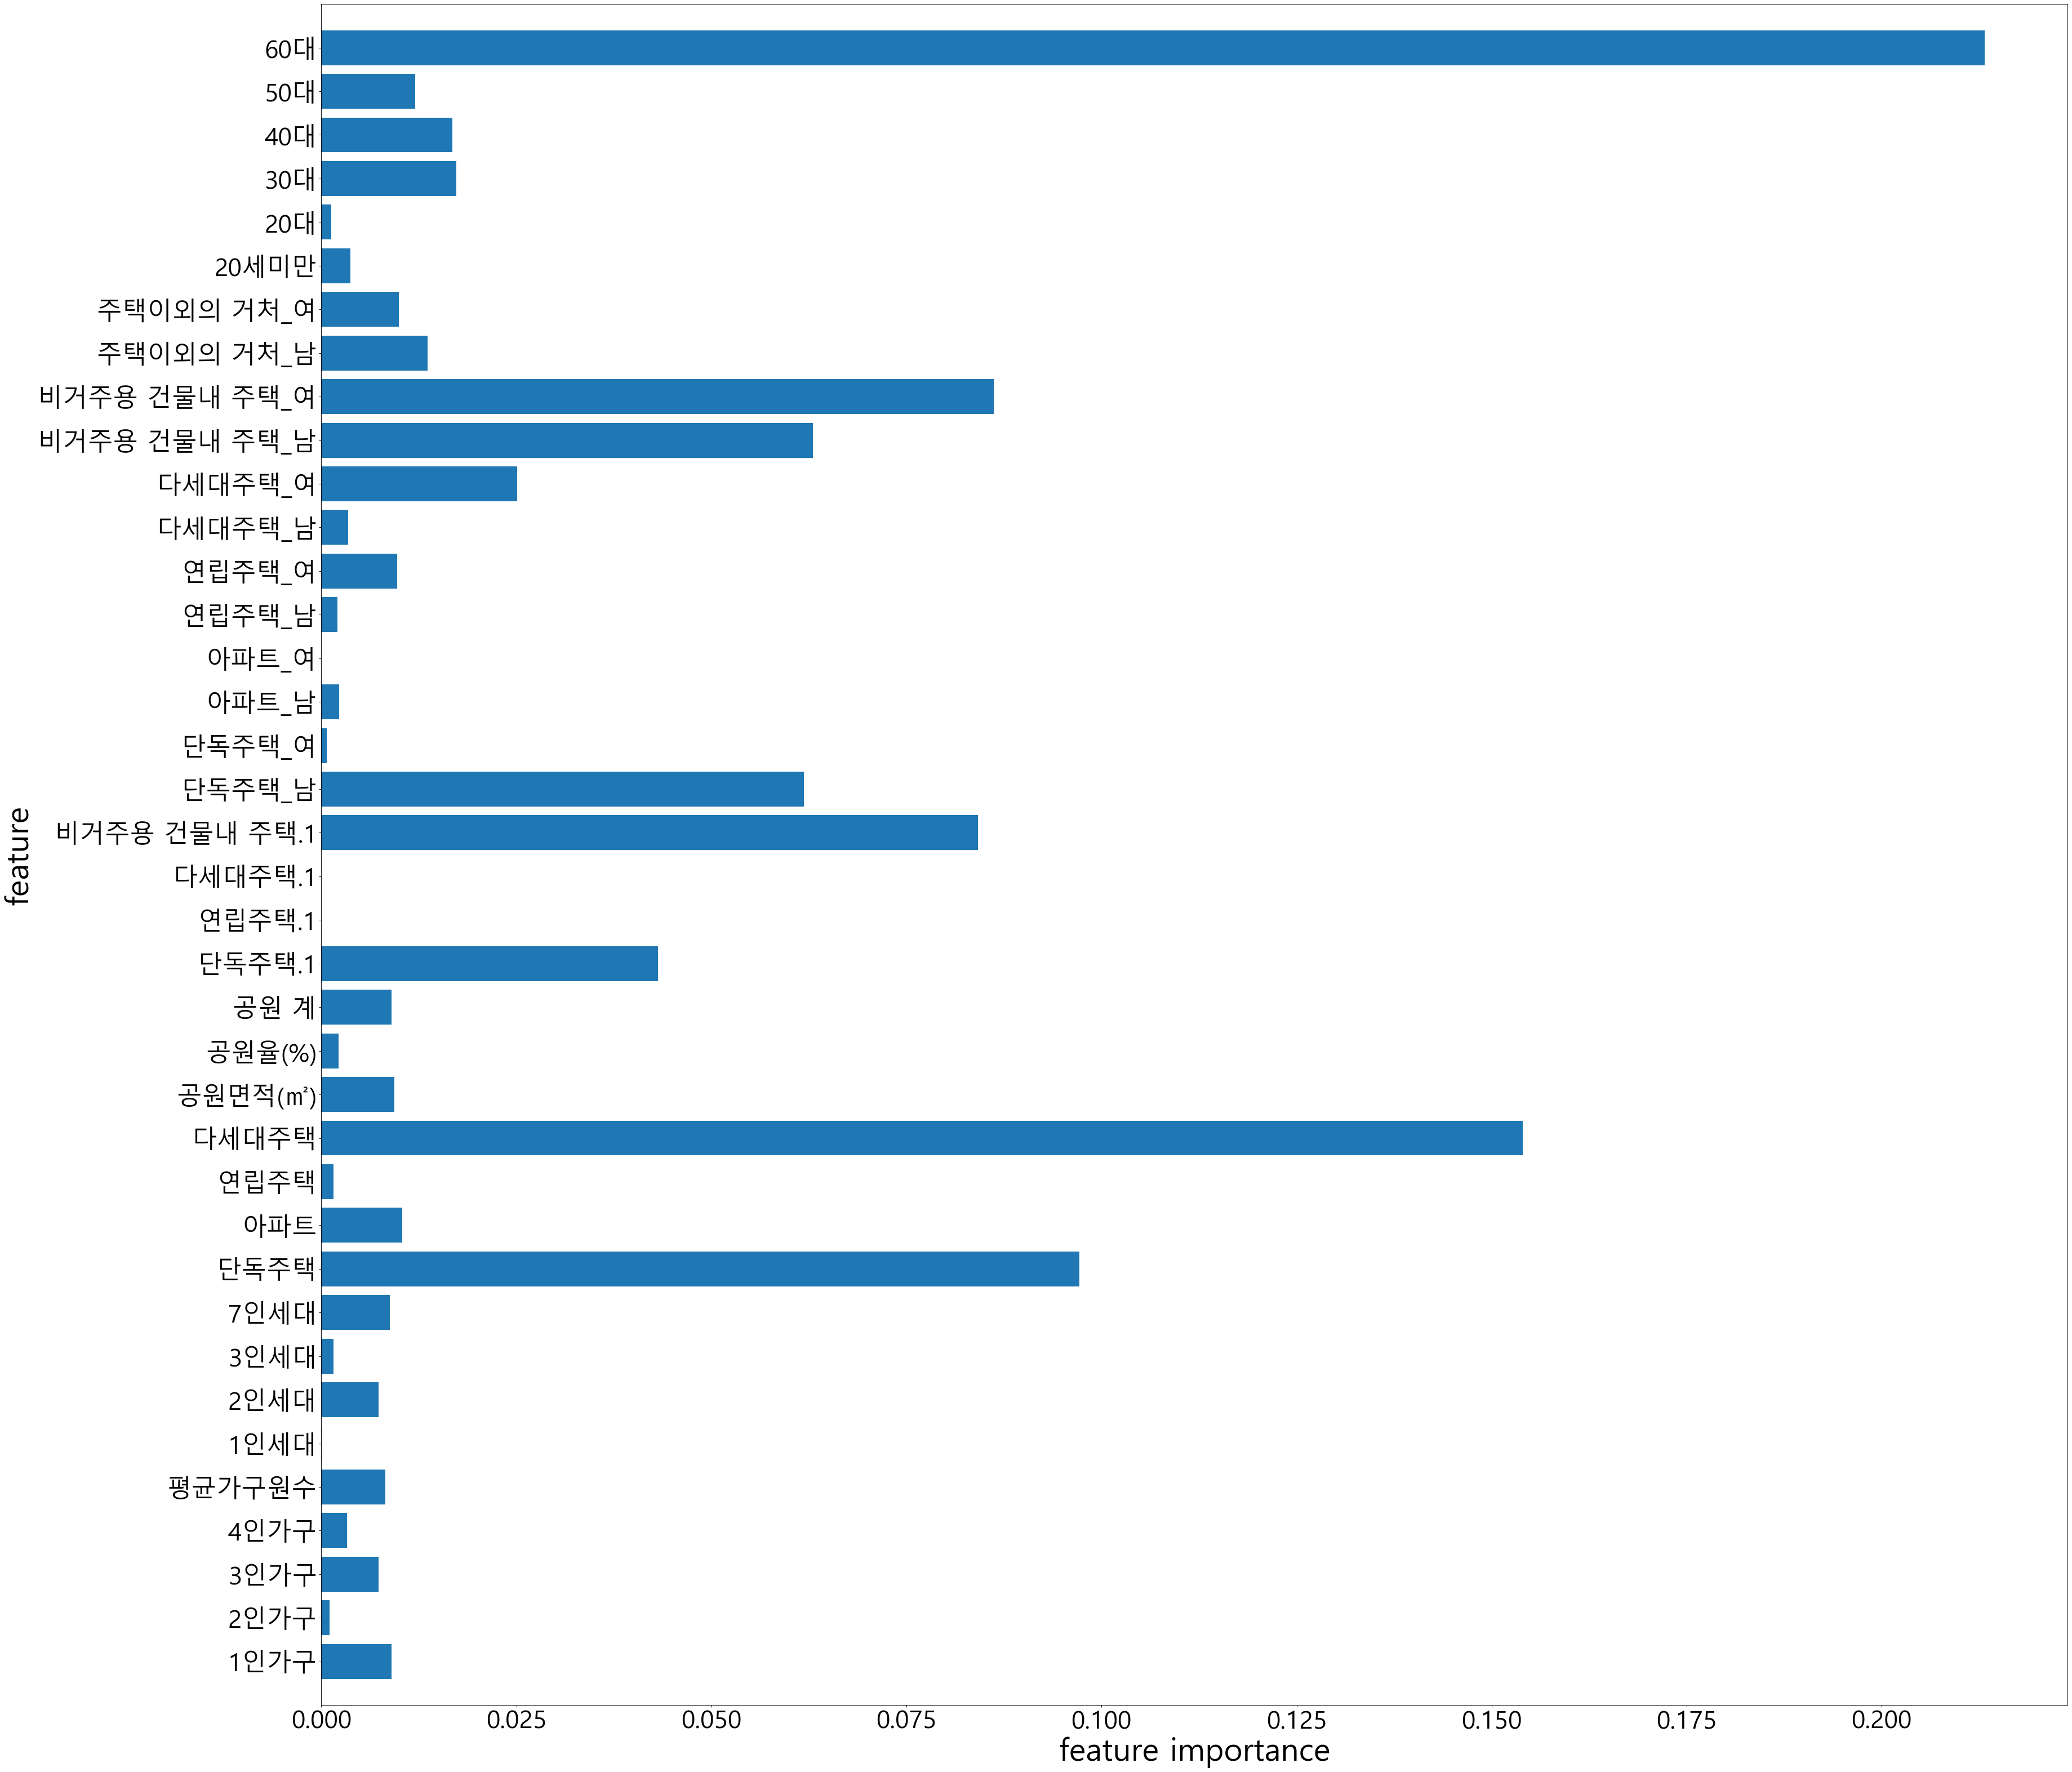

In [82]:
n_feature = train_x.shape[1] #주어진 변수들의 갯수를 구함
index = np.arange(n_feature)

figure(num=None, figsize=(50, 50), dpi=80, facecolor='w', edgecolor='k')

input_var= list( train_x.columns[:] )
plt.barh(index, gbrt.feature_importances_, align='center') 
plt.yticks(index, input_var)
plt.ylim(-1, n_feature)
plt.xlabel('feature importance', size=50)
plt.ylabel('feature', size=50)
plt.show()

### 서울시 유기견 수에 영향을 미치는 요인들
영향을 덜 미치는 요인들은 제외
60대 > 다세대 주택 > 단독주택 > 1인가구 비거주용 건물내 주택_여 > 1인가구 비거주용 건물내 주택 
순으로 영향을 미친다.

In [ ]:
# x 요소가 조금만 움직여도 y값이 증가 폭이 크다.
# 영향력이 없는 것들은 y값에 영향이 없지만, 70세 이상인 사람들의 숫자 변동이 크다.
여기서 영향력이 낮은 요소들은만 빼고 다시 그것들로 돌려야한다.